<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Exercicio_DM_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Carregue a base de dados Mall_Customers.csv do Google Drive observando a curagem de dados
#Substitua a palavra "<complete>" pelo comando adequado

sample_url = "/content/drive/MyDrive/data-mineracao/Mall_Customers.csv"
sample_data = pd.read_csv("/content/drive/MyDrive/data-mineracao/Mall_Customers.csv")

data = sample_data.iloc[:, 3:5].values

sample_data

,ID Cliente,Genero,Age,ComprasAnuais (R$),Score de Gastos (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,),45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Clusrtering usando a distância Euclidiana método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


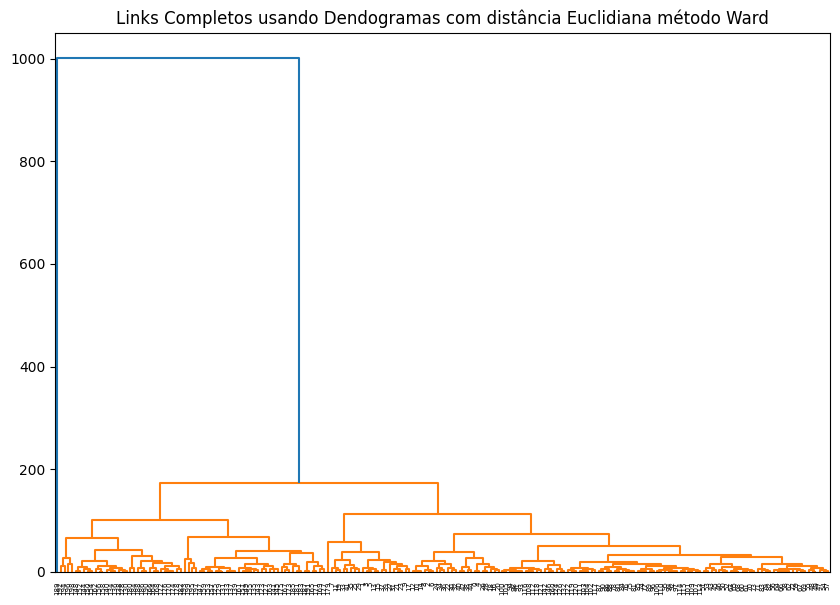

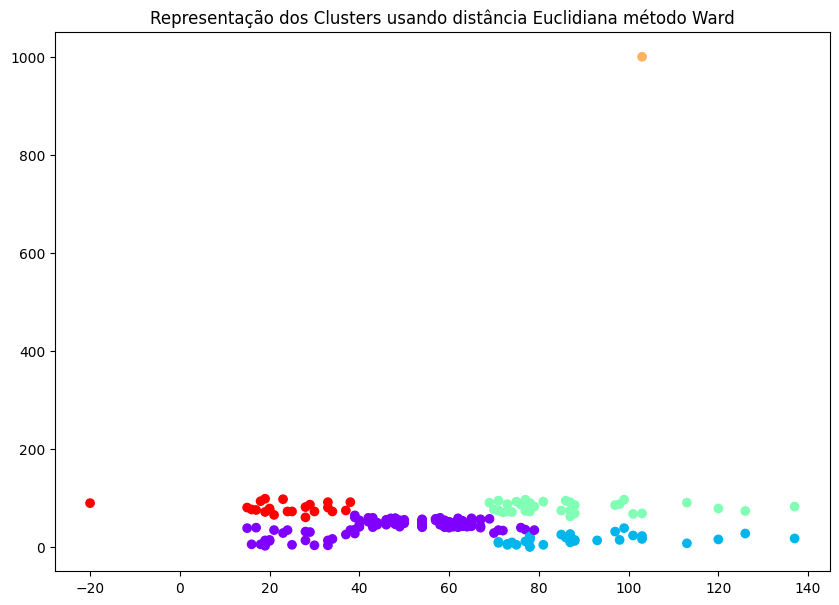

In [16]:
plt.figure(figsize=(10, 7))
plt.title("Links Completos usando Dendogramas com distância Euclidiana método Ward")
dend = sch.dendrogram(sch.linkage(data, method='complete', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Euclidiana método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Clusrtering usando a distância Manhattan método Ward

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


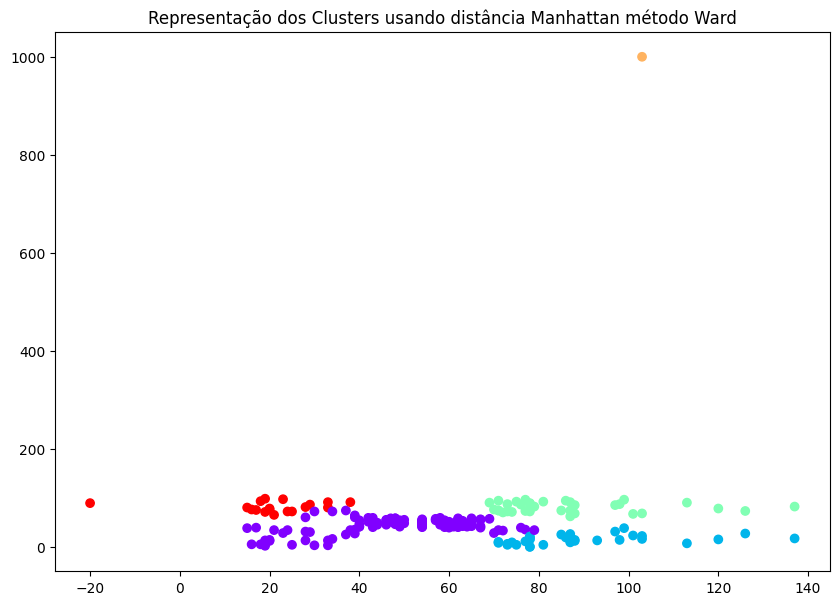

In [17]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='complete')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação dos Clusters usando distância Manhattan método Ward")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


# Representação de Clusters com uso de ligação única

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


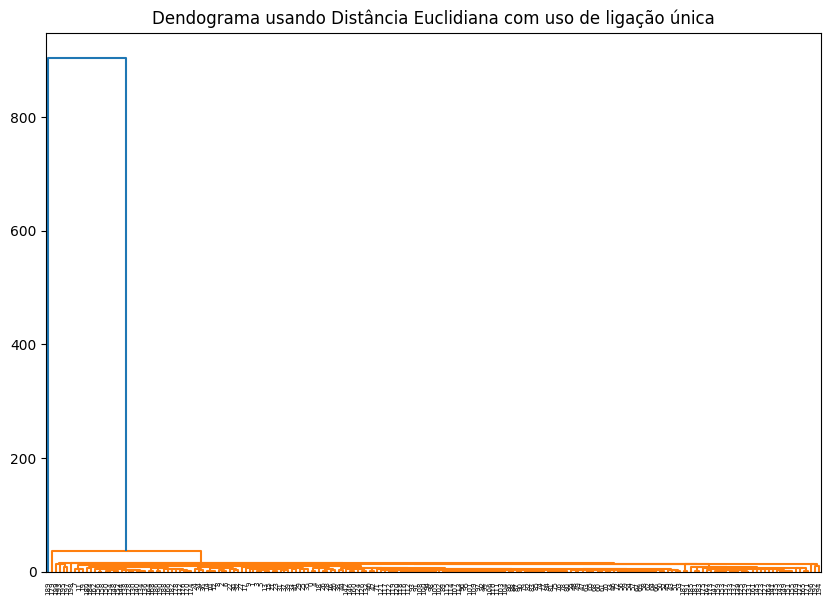

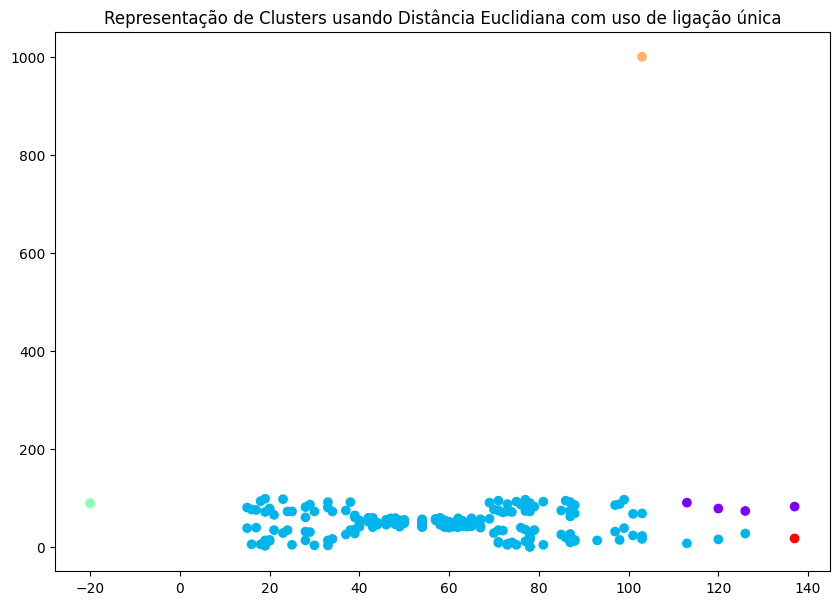

In [18]:
plt.figure(figsize=(10, 7))
plt.title("Dendograma usando Distância Euclidiana com uso de ligação única")
dend = sch.dendrogram(sch.linkage(data, method='single', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Euclidiana com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')


#Representação dos Clusters usando Ligação Única e Métrica Manhathan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


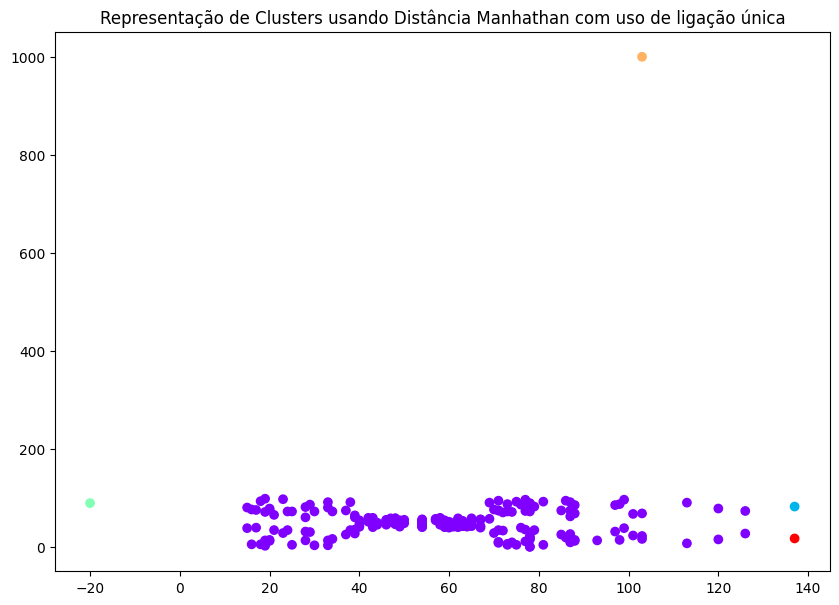

In [19]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='single')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.title("Representação de Clusters usando Distância Manhathan com uso de ligação única")
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Representação de Clusters usando Distância Euclidiana com uso de ligação pela média.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


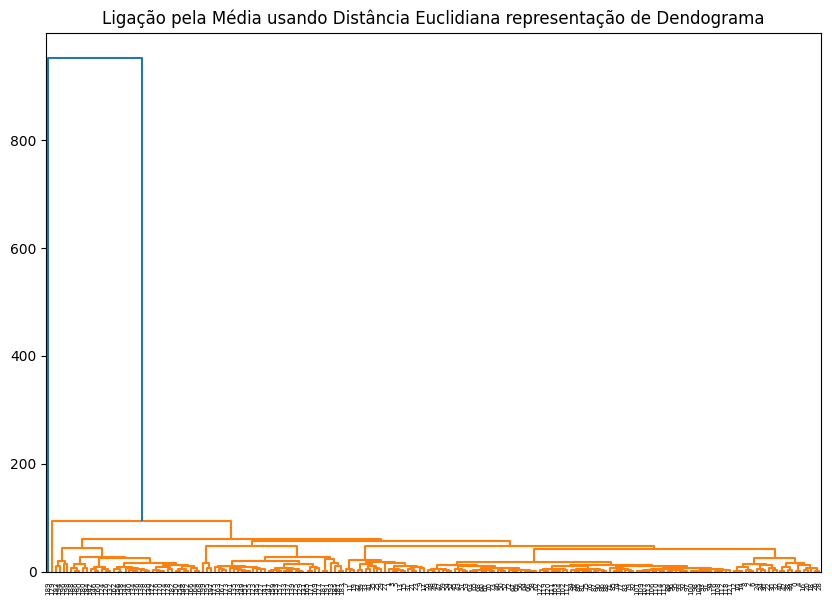

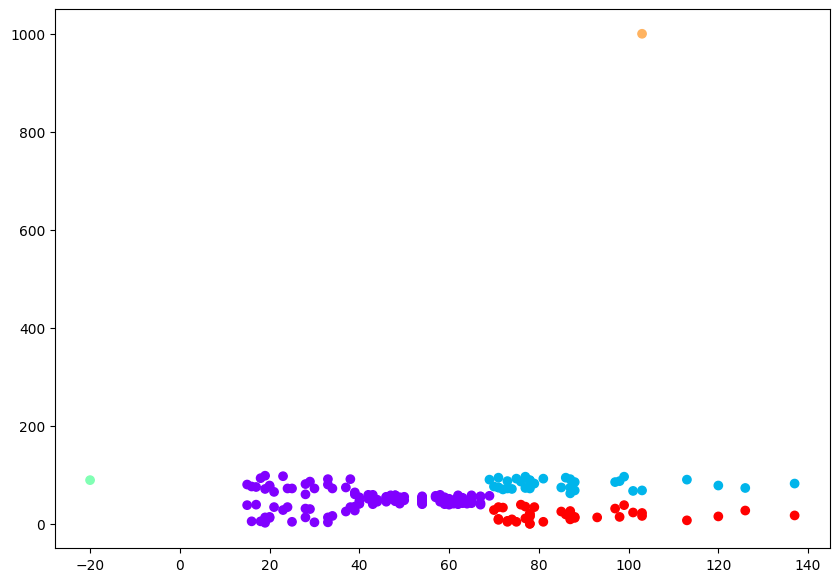

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Ligação pela Média usando Distância Euclidiana representação de Dendograma")
dend = sch.dendrogram(sch.linkage(data, method='average', metric='euclidean'))

euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')

# Ligação pela Média usando Distância Manhattan

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


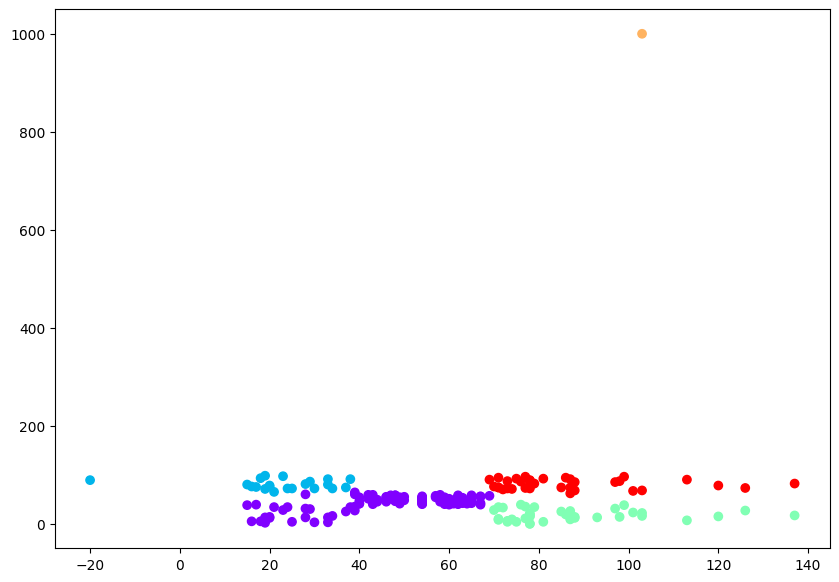

In [21]:
euclidian_cluster = AgglomerativeClustering(n_clusters=5, affinity='manhattan', linkage='average')
euclidian_cluster.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=euclidian_cluster.labels_, cmap='rainbow')